<font size="7">LendingClub project</font>  


<font size="7">by Younes Iferd & Marco Zagermann</font>

# Project Goal
Lending Club is an internet platform that brings together borrowers and investors for peer to peer lending. Lending Club screens the credit applicants and provides detailed information about the loan and the applicant to the investors. It is in the interest of the investor to
- pick borrowers who are likely to pay back the loan
- maximise the interest rate
- distribute the investment over many borrowers to diversify the portfolio
- make their investment decisions fast (as the "best" opprtunities tend to be funded within minutes)   

In this project we use a dataset with 42500 borrowers from Lending Club to feed machine learning models to predict whether a given borrower is likely to pay back the entire credit. Our goal is to find a model that is more accurate than a quick and dirty model based on the credit grade and the annual income alone.

# Data Description

First, lets import some of the libraries that we’ll be using

In [145]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import folium
from folium.plugins import MarkerCluster
from scipy import stats
import matplotlib.pyplot as plt
import pylab
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer
from sklearn.metrics import fbeta_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate

We’ll be using the data dictionary LendingClub provides to help us become familiar with the columns and what each represents in the data set.

In [146]:
description=pd.read_excel('datasets_34_1110834_LCDataDictionary 2.xlsx')
print(description.shape[0])
print(description.columns.tolist())
data_dictionary = description.rename(columns={'LoanStatNew': 'name', 'Description': 'description'})
pd.set_option('display.max_colwidth', -1)
data_dictionary

153
['LoanStatNew', 'Description']


,name,description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan application
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by the borrower during registration.
5,annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration
6,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
7,avg_cur_bal,Average current balance of all accounts
8,bc_open_to_buy,Total open to buy on revolving bankcards.
9,bc_util,Ratio of total current balance to high credit/credit limit for all bankcard accounts.


# Data cleaning 

Let’s read the LendingClub data

In [147]:
data=pd.read_csv("LendingClub_2007.csv")

/Users/younesiferd/opt/anaconda3/envs/nf/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [148]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-2013,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0


In [149]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42538 entries, 0 to 42537
Data columns (total 52 columns):
id                            42538 non-null object
member_id                     42535 non-null float64
loan_amnt                     42535 non-null float64
funded_amnt                   42535 non-null float64
funded_amnt_inv               42535 non-null float64
term                          42535 non-null object
int_rate                      42535 non-null object
installment                   42535 non-null float64
grade                         42535 non-null object
sub_grade                     42535 non-null object
emp_title                     39909 non-null object
emp_length                    41423 non-null object
home_ownership                42535 non-null object
annual_inc                    42531 non-null float64
verification_status           42535 non-null object
issue_d                       42535 non-null object
loan_status                   42535 non-null object
p

We will remove the following variable from the data set:
- acc_now_delinq: reveals information from the future (after the loan has already been funded)
- application_type: no variability
- chargeoff_within_12_mths: reveals information from the future (after the loan has already been funded)
- collection_recovery_fee: reveals information from the future (after the loan has already been funded)
- collections_12_mths_ex_med: no variability
- delinq_amnt: no variability
- funded_amnt: reveals information from the future (after the loan has already been funded)
- funded_amnt_inv: reveals information from the future (after the loan has already been funded)
- id: random variable 
- initial_list_status: no variability
- member_id: random variable
- policy_code: no variability 
- pymnt_plan: no variability
- tax_liens: no variability
- title: contained in purpose
- zip_code: only the first 3 digits of the 5 digit zip code are visibl
- last_credit_pull_d: column contain date values that we will not use in this analysis
- issue_d: reveals information from the future (after the loan has already been funded)
- last_pymnt_amnt: reveals information from the future (after the loan has already been funded)  
- out_prncp: reveals information from the future (after the loan has already been funded)
- out_prncp_inv: reveals information from the future (after the loan has already been funded)
- recoveries: reveals information from the future (after the loan has already been funded)
- total_pymnt: reveals information from the future (after the loan has already been funded)
- total_rec_int: reveals information from the future (after the loan has already been funded) 
- total_pymnt_inv: reveals information from the future (after the loan has already been funded)
- total_rec_prncp: reveals information from the future (after the loan has already been funded)
- total_rec_late_fee: reveals information from the future (after the loan has already been funded)
- last_pymnt_d: reveals information from the future (after the loan has already been funded) 

In [150]:
drop=['acc_now_delinq','application_type','chargeoff_within_12_mths','collection_recovery_fee',
      'collections_12_mths_ex_med','delinq_amnt','funded_amnt','funded_amnt_inv','id','initial_list_status',
      'member_id','policy_code','pymnt_plan','tax_liens','title','zip_code', 'last_credit_pull_d',
      'issue_d', 'last_pymnt_amnt','out_prncp','out_prncp_inv', 'recoveries', "total_pymnt", 
      'total_rec_int','total_pymnt_inv', 'total_rec_prncp', 'total_rec_late_fee', 'last_pymnt_d']

In [151]:
data=data.drop(drop, axis=1)

In [152]:
#for i in range(data.shape[1]):
    #print(data[data['loan_amnt'].isnull()==True].iloc[:,i])

In [153]:
## drop of 3 lines, where there are missings everywhere
data=data.drop(index=[39786,42536,42537])

In [154]:
# We need to format int_rate as a numeric value
data['int_rate']=data['int_rate'].str.rstrip('%').astype('float')

In [155]:
# We need to format revol_util as a numeric value
data['revol_util']=data['revol_util'].str.rstrip('%').astype('float')

In [156]:
# convert sub grade to numeric variable
dict={
    'A1':7.0, 'A2':6.8, 'A3':6.6, 'A4': 6.4, 'A5': 6.2, 
    'B1':6.0, 'B2':5.8, 'B3':5.6, 'B4': 5.4, 'B5': 5.2,
    'C1':5.0, 'C2':4.8, 'C3':4.6, 'C4': 4.4, 'C5': 4.2,
    'D1': 4.0, 'D2': 3.8, 'D3': 3.6, 'D4': 3.4, 'D5': 3.2,
    'E1':3.0, 'E2': 2.8, 'E3': 2.6, 'E4': 2.4, 'E5': 2.2,
    'F1': 2.0, 'F2': 1.8, 'F3': 1.6, 'F4': 1.4, 'F5': 1.2,
    'G1':1.0, 'G2': 0.8, 'G3': 0.6, 'G4': 0.4, 'G5': 0.2}
data['num_grade']=data.replace({'sub_grade': dict})['sub_grade']

# Preparing the label and features for EDA and Machine Learning

## Decide On A Label Column

In [157]:
data.loan_status.value_counts()

Fully Paid                                             33136
Charged Off                                            5634 
Does not meet the credit policy. Status:Fully Paid     1988 
Current                                                961  
Does not meet the credit policy. Status:Charged Off    761  
Late (31-120 days)                                     24   
In Grace Period                                        20   
Late (16-30 days)                                      8    
Default                                                3    
Name: loan_status, dtype: int64

Remember, our goal is to build a machine learning model that can learn from past loans in trying to predict which loans will be charge off and which won’t. From the above table, only the Fully Paid and Charged off values describe the final outcome of a loan. Therefore, we should use only samples where the loan_status column is Fully Paid or Charged Off. We also only take loans with the new credit policy, hence we drop the samples that do not meet the credit policy.

In [158]:
data = data[(data["loan_status"] == "Fully Paid") | (data["loan_status"] == "Charged Off")]

In [159]:
dummy0=pd.get_dummies(data['loan_status'],prefix='loan_status')

## Creating dummy variables for categorial features

In [160]:
# creating dummmy variables for certain groups of employment titles:
titles = data['emp_title'].to_list()
titles = [str(t).lower() for t in titles]
data['emp_title'] = titles
titles = data['emp_title'].to_list()
titles = [t.replace('u.s.','us') for t in titles]
data['emp_title'] = titles
titles = data['emp_title'].to_list()
titles = [t.replace('united state','us') for t in titles]
data['emp_title'] = titles
data['us_emp']=data['emp_title'].str.match('us').astype(int) # for US employees
data['state_emp']=data['emp_title'].str.contains('state').astype(int) # for state employees
data['nan_emp']=data['emp_title'].str.contains('nan').astype(int) # for employees without specification
data['bank_emp'] = data['emp_title'].str.contains('fargo|morgan|bank').astype(int) # for bank employees
data['walmart_emp'] = data['emp_title'].str.contains('walmart').astype(int) # for walmart_emp

In [161]:
data.us_emp.value_counts()

0    37511
1    1259 
Name: us_emp, dtype: int64

In [162]:
data.state_emp.value_counts()

0    38086
1    684  
Name: state_emp, dtype: int64

In [163]:
data.nan_emp.value_counts()

0    36028
1    2742 
Name: nan_emp, dtype: int64

In [164]:
data.bank_emp.value_counts()

0    37607
1    1163 
Name: bank_emp, dtype: int64

In [165]:
data.walmart_emp.value_counts()

0    38653
1    117  
Name: walmart_emp, dtype: int64

In [166]:
# creating dummy for employment length
dummy1=pd.get_dummies(data['emp_length'],prefix='emp_length')

In [167]:
# creating dummy for home_ownership
dummy2=pd.get_dummies(data['home_ownership'],prefix='home_ownership')
dummy2.drop(['home_ownership_NONE','home_ownership_OTHER'], axis=1, inplace=True)

In [168]:
# creating dummy for pub_rec
data["pub_rec"]=data["pub_rec"].replace(2,1).replace(3,1).replace(4,1).replace(5,1)
#data.pub_rec.value_counts()

In [169]:
#data["delinq_2yrs"]=data["delinq_2yrs"].replace(3,2).replace(4,2).replace(5,2).replace(5,1)
data["delinq_2yrs"]=data.delinq_2yrs.apply(lambda x: 2 if x>2 else x)
dummy7=pd.get_dummies(data['delinq_2yrs'],prefix='delinq_2yrs', drop_first=True)

In [170]:
# creating dummy for pub_rec_bankruptcies
data["pub_rec_bankruptcies"]=data["pub_rec_bankruptcies"].replace(2,1)

In [171]:
# creating dummy for purpose
dummy3=pd.get_dummies(data['purpose'],prefix='purpose')
dummy3.drop(['purpose_other'], axis=1, inplace=True)

In [172]:
# creating dummy for term
dummy4=pd.get_dummies(data['term'],prefix='term')
dummy4.drop(['term_ 60 months'], axis=1, inplace=True)

In [173]:
# creating dummy for verification_status
dummy5=pd.get_dummies(data['verification_status'],prefix='verification_status')
dummy5.drop(['verification_status_Source Verified'], axis=1, inplace=True)

In [174]:
# creating dummy for inq_last_6mths
data["inq_last_6mths"]=data.inq_last_6mths.apply(lambda x: 2 if x>2 else x)
dummy8=pd.get_dummies(data['inq_last_6mths'],prefix='inq_last_6mths', drop_first=True)

In [175]:
# creating dummy for five states with the best payback probability and five states with the worst payback probability
lis=['NV','FL','DC','DE','MO','AK','HI','WY','TX','AR']
for i in lis:
    data[i+'_state']=data['addr_state'].str.contains(i).astype(int)

In [176]:
data=pd.concat([data,dummy0,dummy1,dummy2,dummy3,dummy4,dummy5, dummy7, dummy8], axis=1)

## Transforming numeric features for normality

In [177]:
# We need to format earliest_cr_line as a numeric value
vals = data.earliest_cr_line.to_list()
vals = [int(val.split('-')[1])  for val in vals]
data.earliest_cr_line = vals

We use logarithms for the skewed variables. The variables earliest_cr_line and num_grade are oppositely skewed. Hemnce we use different arguments in the logarithms. The resulting variable are approximately normally distributed.

In [178]:
log_list=['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'open_acc','revol_bal',
          'total_acc']
data['num_grade']=data['num_grade'].apply(lambda x: np.log(-x+8))
data['earliest_cr_line']=data['earliest_cr_line'].apply(lambda x: np.log(-x+2015))
data[log_list]=data[log_list].apply(lambda x: np.log(x+1))


# EDA

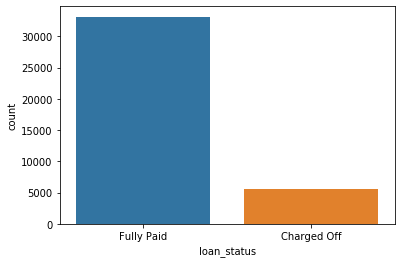

In [179]:
# plot the count of loan status
ax = sns.countplot(x="loan_status", data=data)

[Text(0, 0, 'Arizona'),
 Text(0, 0, 'Georgia'),
 Text(0, 0, 'Illinois'),
 Text(0, 0, 'California'),
 Text(0, 0, 'North Carolina'),
 Text(0, 0, 'Texas'),
 Text(0, 0, 'Virginia'),
 Text(0, 0, 'Missouri'),
 Text(0, 0, 'Connecticut'),
 Text(0, 0, 'Utah'),
 Text(0, 0, 'Florida'),
 Text(0, 0, 'New York'),
 Text(0, 0, 'Pennsylvania'),
 Text(0, 0, 'Minnesota'),
 Text(0, 0, 'New Jersey'),
 Text(0, 0, 'Oregon'),
 Text(0, 0, 'Kentucky'),
 Text(0, 0, 'Ohio'),
 Text(0, 0, 'South Carolina'),
 Text(0, 0, 'Rhode Island'),
 Text(0, 0, 'Louisiana'),
 Text(0, 0, 'Massachusetts'),
 Text(0, 0, 'Washington'),
 Text(0, 0, 'Wisconsin'),
 Text(0, 0, 'Alabama'),
 Text(0, 0, 'Kansas'),
 Text(0, 0, 'Nevada'),
 Text(0, 0, 'Alaska'),
 Text(0, 0, 'Colorado'),
 Text(0, 0, 'Maryland'),
 Text(0, 0, 'West Virginia'),
 Text(0, 0, 'Vermont'),
 Text(0, 0, 'Michigan'),
 Text(0, 0, 'District of Columbia'),
 Text(0, 0, 'South Dakota'),
 Text(0, 0, 'New Hampshire'),
 Text(0, 0, 'Arkansas'),
 Text(0, 0, 'New Mexico'),
 Text(0, 

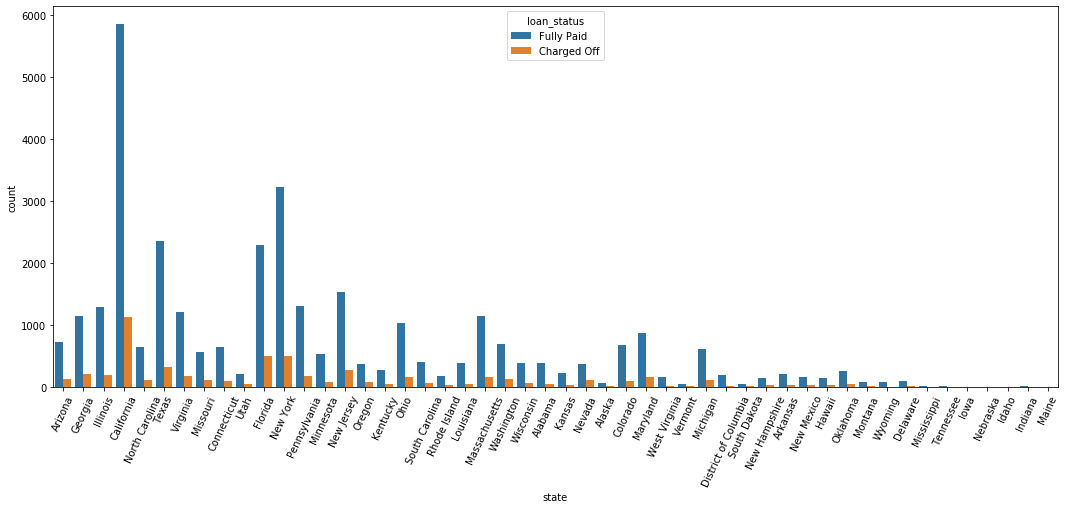

In [180]:
# plot the count of loan status in states
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}
z = pd.DataFrame.from_dict(us_state_abbrev,  orient='index')
z['state']=z.index
z.rename(columns={0: "addr_state"}, inplace=True)
data=pd.merge(data,z,on='addr_state', how='left')
plt.subplots(figsize=(18,7))
chart= sns.countplot(x="state", hue="loan_status", data=data)
chart.set_xticklabels(chart.get_xticklabels(), rotation=65)

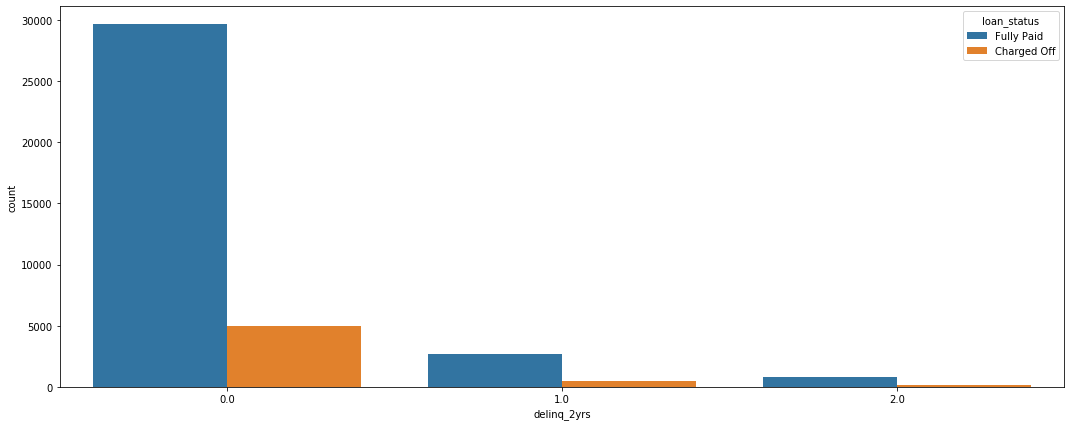

In [181]:
# plot the count of delinq_2yrs differentiated according to loan status 
plt.subplots(figsize=(18,7))
ax = sns.countplot(x="delinq_2yrs", hue="loan_status", data=data)

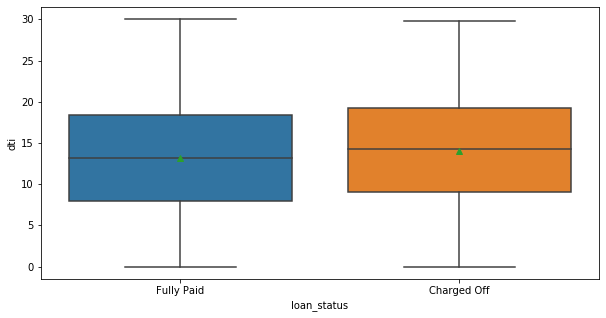

In [182]:
# plot loan_status and dti
plt.subplots(figsize=(10,5))
sns.boxplot(x='loan_status', y="dti", data=data, showmeans = True)
plt.show()

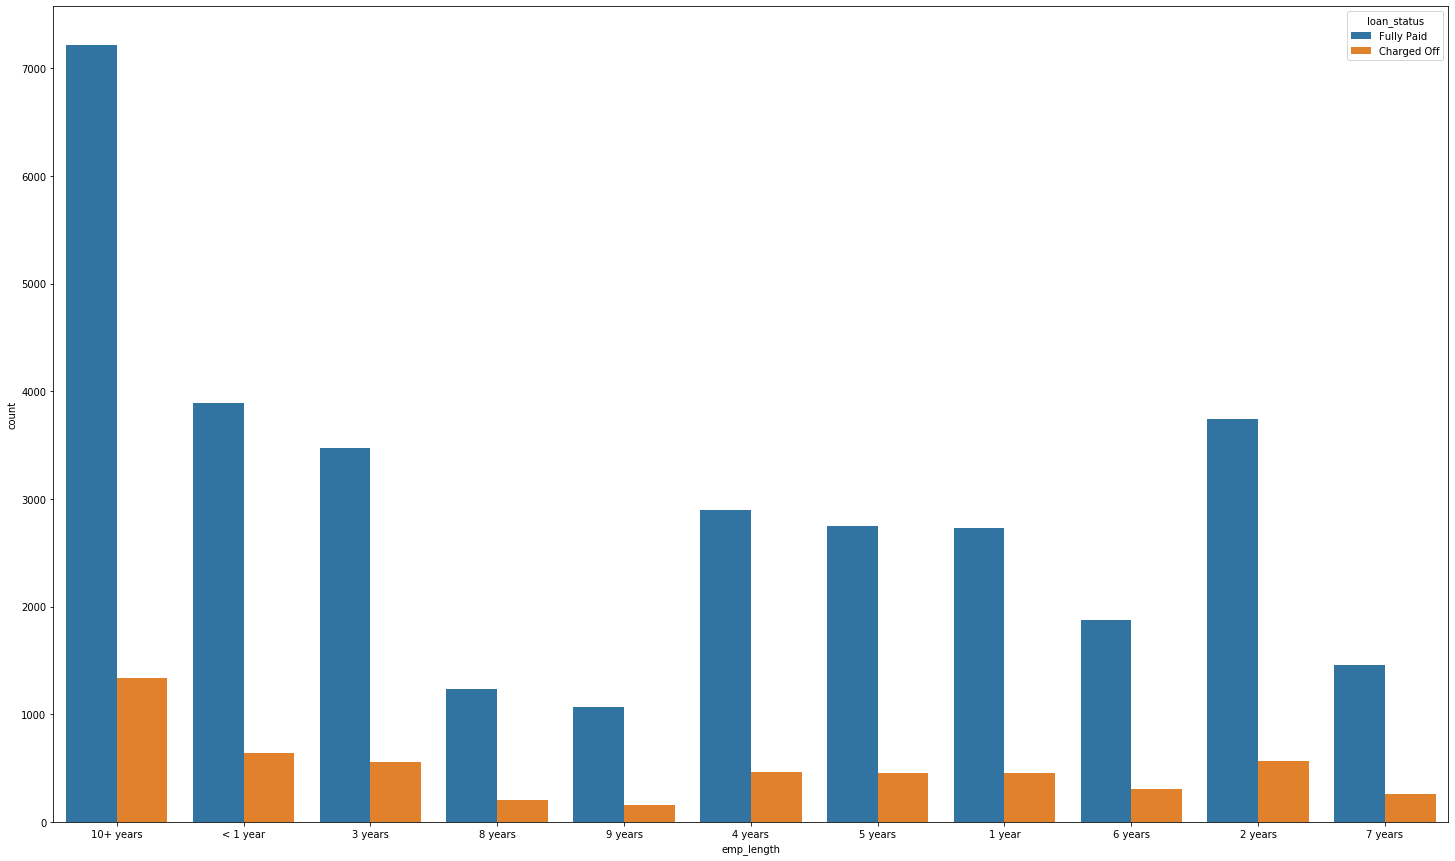

In [183]:
# plot emp_lenght differentiated according to loan status 
plt.subplots(figsize=(25,15))
ax = sns.countplot(x="emp_length", hue="loan_status", data=data)

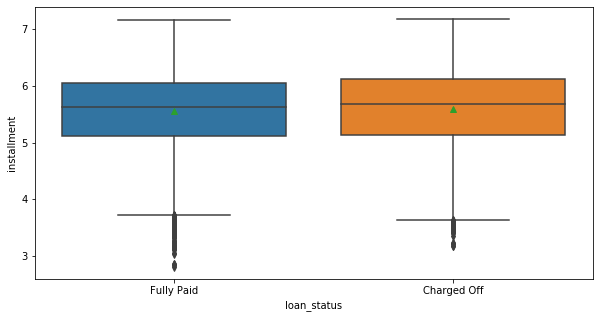

In [184]:
# plot installment differentiated according to loan status 
plt.subplots(figsize=(10,5))
sns.boxplot(x='loan_status', y="installment", data=data, showmeans = True)
plt.show()

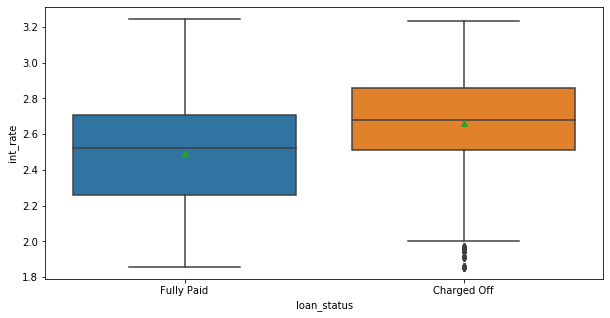

In [185]:
# plot int_rate differentiated according to loan status 
plt.subplots(figsize=(10,5))
sns.boxplot(x='loan_status', y="int_rate", data=data, showmeans = True)
plt.show()

[Text(0, 0, 'Nevada'),
 Text(0, 0, 'Alaska'),
 Text(0, 0, 'Florida'),
 Text(0, 0, 'Missouri'),
 Text(0, 0, 'Hawaii'),
 Text(0, 0, 'New Mexico'),
 Text(0, 0, 'Oregon'),
 Text(0, 0, 'California'),
 Text(0, 0, 'Utah'),
 Text(0, 0, 'Maryland'),
 Text(0, 0, 'Georgia'),
 Text(0, 0, 'New Jersey'),
 Text(0, 0, 'Washington'),
 Text(0, 0, 'New Hampshire'),
 Text(0, 0, 'North Carolina'),
 Text(0, 0, 'Michigan'),
 Text(0, 0, 'Arizona'),
 Text(0, 0, 'Wisconsin'),
 Text(0, 0, 'Kentucky'),
 Text(0, 0, 'South Carolina'),
 Text(0, 0, 'Oklahoma'),
 Text(0, 0, 'Minnesota'),
 Text(0, 0, 'Montana'),
 Text(0, 0, 'New York'),
 Text(0, 0, 'Illinois'),
 Text(0, 0, 'Ohio'),
 Text(0, 0, 'Virginia'),
 Text(0, 0, 'Connecticut'),
 Text(0, 0, 'Rhode Island'),
 Text(0, 0, 'Colorado'),
 Text(0, 0, 'Louisiana'),
 Text(0, 0, 'Massachusetts'),
 Text(0, 0, 'Pennsylvania'),
 Text(0, 0, 'Alabama'),
 Text(0, 0, 'West Virginia'),
 Text(0, 0, 'Kansas'),
 Text(0, 0, 'Texas'),
 Text(0, 0, 'Arkansas'),
 Text(0, 0, 'Delaware'),
 T

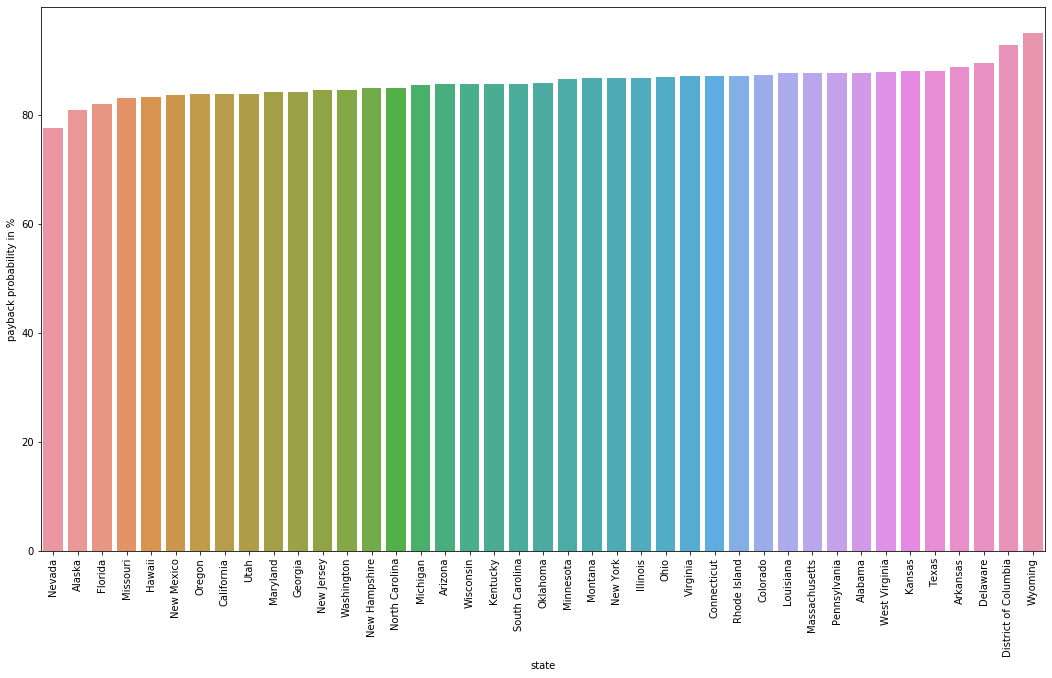

In [186]:
# plot the payback probabilite (q) in the states
df=data.groupby('state').agg({'loan_amnt': ['sum', 'mean'], 'loan_status_Charged Off': 'sum',
                'loan_status_Fully Paid': 'sum', 'num_grade': "mean", 'int_rate': "mean", 'annual_inc' : 'mean'})
df.columns = ["_".join(x) for x in df.columns.ravel()]
df=df.reset_index()
df["q"]=(round(df["loan_status_Fully Paid_sum"]/(df["loan_status_Charged Off_sum"]+df["loan_status_Fully Paid_sum"]), 3))*100
df=df.sort_values(by="q")
df=df[(df['loan_status_Charged Off_sum']+df['loan_status_Fully Paid_sum'])>75].sort_values(by="q")
plt.subplots(figsize=(18,10))
ax = sns.barplot(x="state", y="q", data=df, )
ax.set(xlabel='state', ylabel='payback probability in %')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


In [187]:
df=df[(df['loan_status_Charged Off_sum']+df['loan_status_Fully Paid_sum'])>75].sort_values(by="q")

In [188]:
data.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'loan_status', 'purpose', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'pub_rec_bankruptcies', 'num_grade', 'us_emp', 'state_emp', 'nan_emp',
       'bank_emp', 'walmart_emp', 'NV_state', 'FL_state', 'DC_state',
       'DE_state', 'MO_state', 'AK_state', 'HI_state', 'WY_state', 'TX_state',
       'AR_state', 'loan_status_Charged Off', 'loan_status_Fully Paid',
       'emp_length_1 year', 'emp_length_10+ years', 'emp_length_2 years',
       'emp_length_3 years', 'emp_length_4 years', 'emp_length_5 years',
       'emp_length_6 years', 'emp_length_7 years', 'emp_length_8 years',
       'emp_length_9 years', 'emp_length_< 1 year', 'home_ownership_MORTGAGE',
       'home_ownership_OWN', 'home_ownership_RENT', 

In [189]:
t=data[["addr_state", "state"]].sort_values(by=("addr_state")).drop_duplicates("state")


In [190]:
df=pd.merge(df,t,on='state', how='left')

In [191]:
df

,state,loan_amnt_sum,loan_amnt_mean,loan_status_Charged Off_sum,loan_status_Fully Paid_sum,num_grade_mean,int_rate_mean,annual_inc_mean,q,addr_state
0,Nevada,4354.185640,9.033580,108.0,374.0,1.057060,2.563907,10.984124,77.6,NV
1,Alaska,719.503928,9.224409,15.0,63.0,1.067517,2.568995,11.102913,80.8,AK
2,Florida,25241.143603,9.034053,505.0,2289.0,0.972659,2.511302,10.894421,81.9,FL
3,Missouri,6074.115825,9.038863,114.0,558.0,0.947420,2.495440,10.870861,83.0,MO
4,Hawaii,1511.935163,9.053504,28.0,139.0,1.026214,2.552639,10.893754,83.2,HI
5,New Mexico,1657.333109,9.007245,30.0,154.0,0.951207,2.497667,10.900904,83.7,NM
6,Oregon,3942.343512,9.021381,71.0,366.0,0.974554,2.510814,10.817042,83.8,OR
7,California,63358.248907,9.092745,1125.0,5843.0,1.002581,2.530194,11.012555,83.9,CA
8,Utah,2295.992490,9.039341,41.0,213.0,0.989839,2.524693,10.928652,83.9,UT
9,Georgia,12358.147848,9.060226,215.0,1149.0,0.963524,2.506800,10.980527,84.2,GA


In [192]:


# plot map of the payback probabilite (q) in the states
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
state_geo = f'{url}/us-states.json'
#p=['loan_amnt_sum', 'loan_amnt_mean','loan_status_Charged Off_sum', 'loan_status_Fully Paid_sum',
   #'num_grade_mean', 'int_rate_mean','q', 'annual_inc_mean', 'over_est']
k = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth(
    geo_data=state_geo,
    name='payback probabilite by state',
    data=df,
    columns=['addr_state', 'q'],
    key_on='feature.id',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='payback probabilite by state'
).add_to(k)

folium.LayerControl().add_to(k)
#marker_cluster = MarkerCluster().add_to(m)
#m.save('m.html')
k

[Text(0, 0.5, 'payback probability'),
 Text(0.5, 0, 'the best and worst three state')]

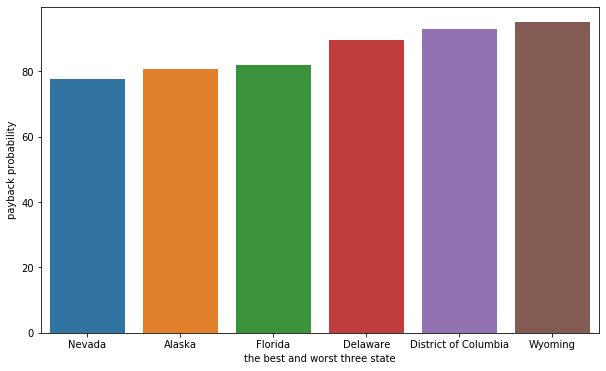

In [193]:
# plot the three states with the best payback probability and three states with the worst payback probability
df.insert(0, 'ID', range(41))
df= df.query("ID<3 or  ID>37")
import seaborn as sns
plt.subplots(figsize=(10,6))
ax = sns.barplot(x="state", y="q", data=df, order=df['state'])
ax.set(xlabel='the best and worst three state', ylabel='payback probability')

Text(0, 0.5, 'payback probability')

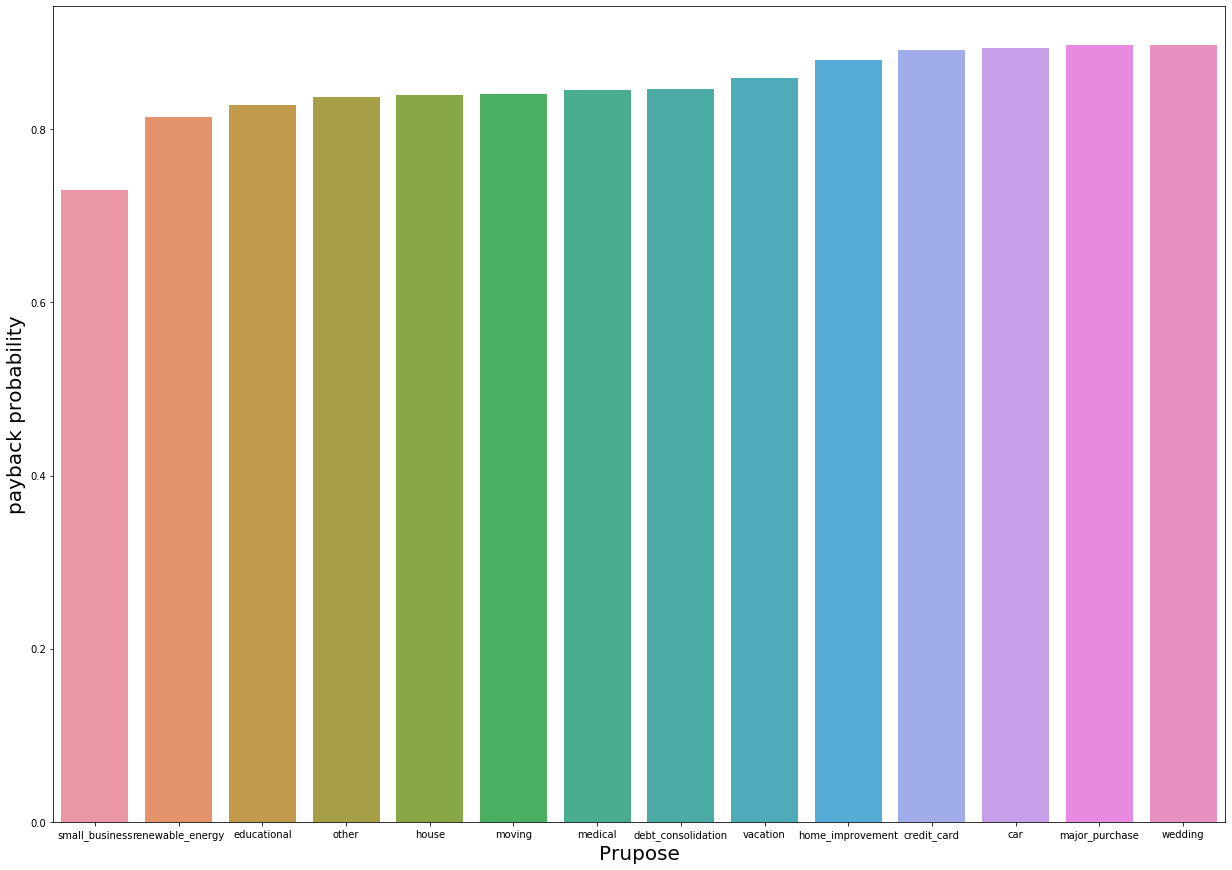

In [194]:
# plot the payback probability differentiated according to purpose 
d_p=data.groupby('purpose').agg({'loan_amnt': ['sum', 'mean'], 'loan_status_Charged Off': 'sum',
                'loan_status_Fully Paid': 'sum', 'num_grade': "mean", 'int_rate': "mean", 'annual_inc' : 'mean'})
d_p.columns = ["_".join(x) for x in d_p.columns.ravel()]
d_p=d_p.reset_index()
d_p["q"]=round(d_p["loan_status_Fully Paid_sum"]/(d_p["loan_status_Charged Off_sum"]+d_p["loan_status_Fully Paid_sum"]), 3)
d_p=d_p.sort_values(by="q")
plt.subplots(figsize=(21,15))
ax = sns.barplot(x="purpose", y="q", data=d_p, order=d_p['purpose'])
ax.set(xlabel='purpose', ylabel='payback probability')
ax.set_xlabel('Prupose',fontsize=20);
ax.set_ylabel('payback probability',fontsize=20)

[Text(0, 0.5, 'payback probability'), Text(0.5, 0, 'grade')]

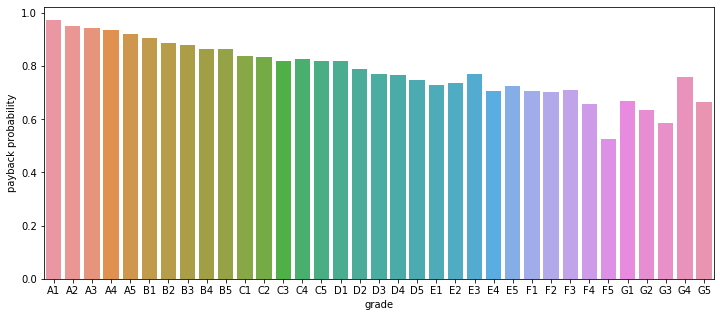

In [195]:
# plot the payback probability differentiated according to grade 
d_g=data.groupby('sub_grade').agg({'loan_amnt': ['sum', 'mean'], 'loan_status_Charged Off': 'sum',
                'loan_status_Fully Paid': 'sum', 'num_grade': "mean", 'int_rate': "mean", 'annual_inc' : 'mean'})
d_g.columns = ["_".join(x) for x in d_g.columns.ravel()]
d_g=d_g.reset_index()
d_g["q"]=round(d_g["loan_status_Fully Paid_sum"]/(d_g["loan_status_Charged Off_sum"]+d_g["loan_status_Fully Paid_sum"]), 3)
plt.subplots(figsize=(12,5))
ax = sns.barplot(x="sub_grade", y="q", data=d_g)
ax.set(xlabel='grade', ylabel='payback probability')

[Text(0, 0.5, 'payback probability'), Text(0.5, 0, 'income')]

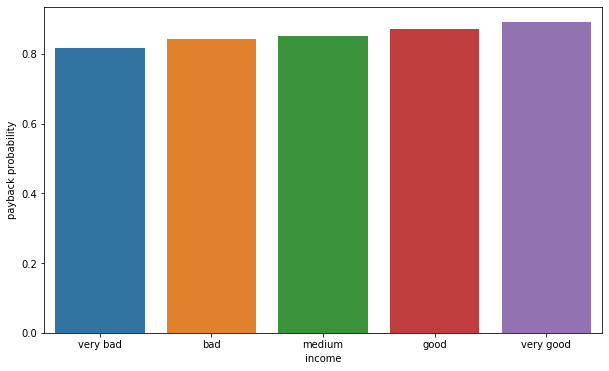

In [196]:
# plot the payback probability differentiated according to income category 
data['income_category']=pd.qcut(data.annual_inc,
       5, labels=["very bad", 'bad', 'medium', 'good', 'very good'])
d_c=data.groupby('income_category').agg({'loan_amnt': ['sum', 'mean'], 'loan_status_Charged Off': 'sum',
                'loan_status_Fully Paid': 'sum', 'num_grade': "mean", 'int_rate': "mean"})
d_c.columns = ["_".join(x) for x in d_c.columns.ravel()]
d_c=d_c.reset_index()
d_c["q"]=d_c["loan_status_Fully Paid_sum"]/(d_c["loan_status_Charged Off_sum"]+d_c["loan_status_Fully Paid_sum"])
d_c=d_c.sort_values(by="q")
plt.subplots(figsize=(10,6))
ax = sns.barplot(x="income_category", y="q", data=d_c)
ax.set(xlabel='income', ylabel='payback probability')

[Text(0, 0.5, 'payback probability'), Text(0.5, 0, 'Interest rate')]

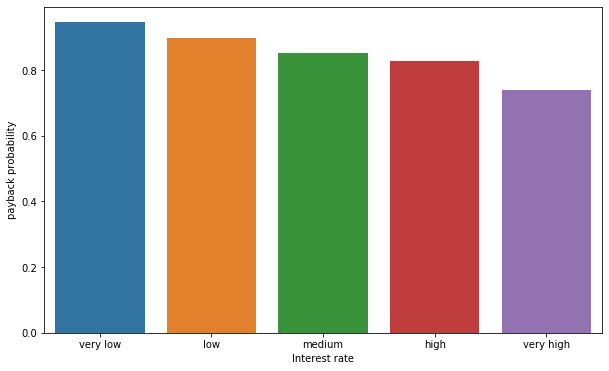

In [197]:
# plot the payback probability differentiated according to Interest rate category
data['int_rate_category']=pd.qcut(data.int_rate,
       5, labels=["very low", 'low', 'medium', 'high', 'very high'])
d_int=data.groupby('int_rate_category').agg({'loan_amnt': ['sum', 'mean'], 'loan_status_Charged Off': 'sum',
                'loan_status_Fully Paid': 'sum', 'num_grade': "mean", 'int_rate': "mean"})
d_int.columns = ["_".join(x) for x in d_int.columns.ravel()]
d_int=d_int.reset_index()
d_int["q"]=round(d_int["loan_status_Fully Paid_sum"]/(d_int["loan_status_Charged Off_sum"]+d_int["loan_status_Fully Paid_sum"]), 3)
d_int=d_int.sort_values(by="q")
plt.subplots(figsize=(10,6))
ax = sns.barplot(x="int_rate_category", y="q", data=d_int)
ax.set(xlabel='Interest rate', ylabel='payback probability')

[Text(0, 0.5, 'payback probability'),
 Text(0.5, 0, 'Revolving utilization Rate')]

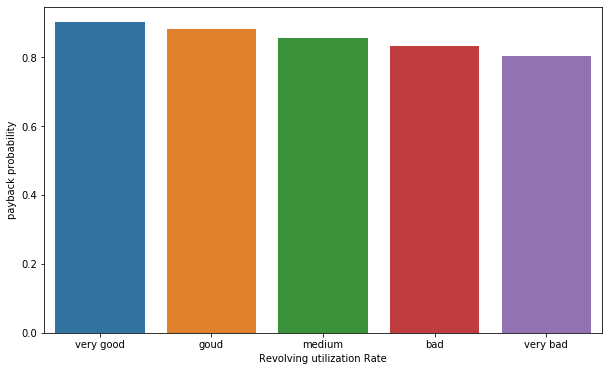

In [198]:
# plot the payback probability differentiated according to Revolving utilization Rate
data['revol_util_category']=pd.qcut(data.revol_util,
       5, labels=['very good', 'goud','medium', 'bad', "very bad",])
d_util=data.groupby('revol_util_category').agg({'loan_amnt': ['sum', 'mean'], 'loan_status_Charged Off': 'sum',
                'loan_status_Fully Paid': 'sum', 'num_grade': "mean", 'int_rate': "mean"})
d_util.columns = ["_".join(x) for x in d_util.columns.ravel()]
d_util=d_util.reset_index()
d_util["q"]=round(d_util["loan_status_Fully Paid_sum"]/(d_util["loan_status_Charged Off_sum"]+d_util["loan_status_Fully Paid_sum"]), 3)
d_util=d_util.sort_values(by="q")
plt.subplots(figsize=(10,6))
ax = sns.barplot(x="revol_util_category", y="q", data=d_util)
ax.set(xlabel='Revolving utilization Rate', ylabel='payback probability')

[Text(0, 0.5, 'payback probability'), Text(0.5, 0, 'term')]

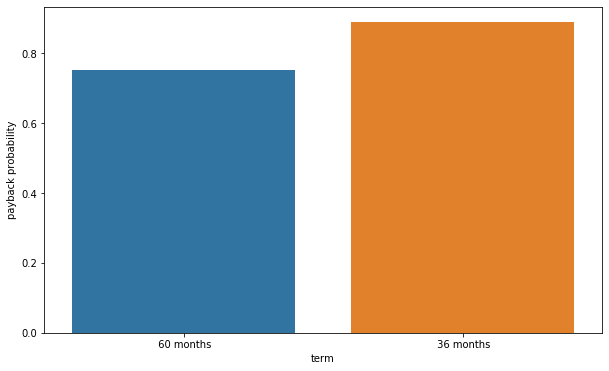

In [199]:
# plot the payback probability differentiated according to term
d_term=data.groupby('term').agg({'loan_amnt': ['sum', 'mean'], 'loan_status_Charged Off': 'sum',
                'loan_status_Fully Paid': 'sum', 'num_grade': "mean", 'int_rate': "mean"})
d_term.columns = ["_".join(x) for x in d_term.columns.ravel()]
d_term=d_term.reset_index()
d_term["q"]=round(d_term["loan_status_Fully Paid_sum"]/(d_term["loan_status_Charged Off_sum"]+d_term["loan_status_Fully Paid_sum"]), 3)
d_term=d_term.sort_values(by="q")
plt.subplots(figsize=(10,6))
ax = sns.barplot(x="term", y="q", data=d_term)
ax.set(xlabel='term', ylabel='payback probability')

[Text(0, 0.5, 'payback probability'), Text(0.5, 0, 'employment title')]

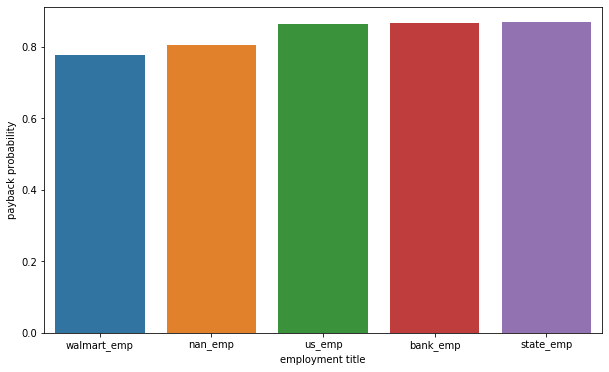

In [200]:
# plot the payback probability differentiated according to employement title
data.loc[data['us_emp']==1, "emp"] = "us_emp"
data.loc[data['state_emp']==1, "emp"] = "state_emp"
data.loc[data['nan_emp']==1, "emp"] = "nan_emp"
data.loc[data['bank_emp']==1, "emp"] = "bank_emp"
data.loc[data['walmart_emp']==1, "emp"] = "walmart_emp"
d_em=data.groupby('emp').agg({'loan_amnt': ['sum', 'mean'], 'loan_status_Charged Off': 'sum',
                'loan_status_Fully Paid': 'sum', 'num_grade': "mean", 'int_rate': "mean"})
d_em.columns = ["_".join(x) for x in d_em.columns.ravel()]
d_em=d_em.reset_index()
d_em["q"]=round(d_em["loan_status_Fully Paid_sum"]/(d_em["loan_status_Charged Off_sum"]+d_em["loan_status_Fully Paid_sum"]), 3)
d_em=d_em.sort_values(by="q")
plt.subplots(figsize=(10,6))
ax = sns.barplot(x="emp", y="q", data=d_em)
ax.set(xlabel='employment title', ylabel='payback probability')

# The Implementation of machine learning algorithms

In [201]:
X=data[['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
       'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'pub_rec_bankruptcies', 'NV_state', 'FL_state', 'DC_state',
       'DE_state', 'MO_state', 'AK_state', 'HI_state', 'WY_state', 'TX_state',
       'AR_state', 'us_emp', 'state_emp', 'nan_emp', 'bank_emp', 'walmart_emp',
       'num_grade', 'emp_length_1 year', 'emp_length_10+ years',
       'emp_length_2 years', 'emp_length_3 years', 'emp_length_4 years',
       'emp_length_5 years', 'emp_length_6 years', 'emp_length_7 years',
       'emp_length_8 years', 'emp_length_9 years', 'emp_length_< 1 year',
       'home_ownership_MORTGAGE', 'home_ownership_OWN', 'home_ownership_RENT',
       'purpose_car', 'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'term_ 36 months',
       'verification_status_Not Verified', 'verification_status_Verified',
       'delinq_2yrs_1.0', 'delinq_2yrs_2.0', 'inq_last_6mths_1.0',
       'inq_last_6mths_2.0']]
X['interaction']=X['int_rate']*X['annual_inc']

/Users/younesiferd/opt/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [202]:
y=data['loan_status_Fully Paid']

In [203]:
# split the data in train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)
# Show the results of the split
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 31016 samples.
Testing set has 7754 samples.


## Handling missing data in train test data

In [204]:
X_train.pub_rec_bankruptcies.fillna(0.0, inplace=True)

/Users/younesiferd/opt/anaconda3/envs/nf/lib/python3.6/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [205]:
m=X_train.revol_util.median()
X_train.revol_util.fillna(m, inplace=True)

In [206]:
X_test.pub_rec_bankruptcies.fillna(0.0, inplace=True)

In [207]:
m=X_test.revol_util.median()
X_test.revol_util.fillna(m, inplace=True)

In order to compute the baseline model, we merge X_test and y_test to a new DataFrame (base_df) before we do the scaling in the next section

In [208]:
base_df=pd.concat([X_test,y_test], axis =1)

## scaling the data

In [209]:
scale=['loan_amnt', 'int_rate', 'installment', 'annual_inc','dti', 'earliest_cr_line',
       'open_acc','revol_bal', 'revol_util','total_acc','num_grade']
scaler = StandardScaler()
numerical = scale
scaler.fit(X_train[numerical])
X_train_scaled = X_train
X_train_scaled[numerical] = scaler.transform(X_train[numerical])
X_test_scaled = X_test
X_test_scaled[numerical] = scaler.transform(X_test[numerical])

/Users/younesiferd/opt/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/younesiferd/opt/anaconda3/envs/nf/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Users/younesiferd/opt/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

In [210]:
#scaler = StandardScaler()
#numerical = scale
#X_test[numerical] = scaler.transform(X_test[numerical])

## Machine learning models

### A baseline model

Before we study various machine learning algorithms on our data set, 
we define a baseline model in order to compare the results. To this end, we use the credit grade and the annual 
income as the only predictors with a cutoff model. As we want to apply the model to the test data, we have to use 
base_df.

We make a cutoff at grade B2 (i.e. we pick A1 - B2), which means num_grade < 0.79 because of the logarithm. Moreover, we take annual_income > 10.819798, which corresponds to annual income of at least 50 000 USD due to the logarithm:

In [211]:
dfx = base_df[(base_df["num_grade"] < 0.79 ) & (base_df["annual_inc"] >  10.819798)]
dfy = base_df[(base_df["num_grade"] >= 0.79 ) | (base_df["annual_inc"]<=   10.819798) ]
a= dfx[dfx['loan_status_Fully Paid']==1]['loan_status_Fully Paid'].count()
b= dfx[dfx['loan_status_Fully Paid']==0]['loan_status_Fully Paid'].count()
c= dfy[dfy['loan_status_Fully Paid']==1]['loan_status_Fully Paid'].count()
d= dfy[dfy['loan_status_Fully Paid']==0]['loan_status_Fully Paid'].count()

print(a/(b+a))
print(a/(a+c))

0.9494649227110583
0.24112939755397855


Thus, we get 95 % precision at recall 24%. This is what we want to beat with machine learning models. Remark: When we used the full data set, we had 20% recall for A1-A5 and income 50000 USD or more.

### Logistic regression

#### Default model

In [214]:
log_reg = LogisticRegression(random_state=7, max_iter=10000)
#log_reg = LogisticRegression(C=0.1, class_weight={0:0.9,1:0.10},random_state=7, max_iter=500)
log_reg.fit(X_train, y_train)
y_pred=log_reg.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred) }")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"ROC_AUC: {roc_auc_score(y_test, y_pred)}")

[[  21 1110]
 [  28 6595]]
Accuracy: 0.8532370389476399
Precision: 0.8559377027903958
Recall: 0.9957723086214706
ROC_AUC: 0.5071699739393825


The ROC_AUC shows that this model is barely better than random (i.e. than the model where we give 'Fully paid ' to everybody.). The reason is that the distribution of our target variable is imbalanced. We therefore use a grid search to find better hyperparameters. For logistic regression these are the class weight, the hyperparameter C and the penalty norm. The class weight will turn out to be particularly useful.

#### Maximising precision

In [216]:
param_log_reg = {'penalty':('l1','l2'),
                'C': [0.0001,0.001, 0.01, 0.02,0.05, 0.1,0.5, 1, 10, 100,20],
                'class_weight': [{0: 0.1,1:0.9}, {0:0.2,1:0.8}, {0:0.3,1:0.7}, {0:0.4,1:0.6}, 
                                 {0:0.5,1:0.5}, {0:0.6,1:0.4}, {0:0.7,1:0.3}, {0: 0.8, 1:0.2}, {0: 0.85, 1:0.15}, 
                                 {0: 0.9, 1:0.10}, {0: 0.95, 1: 0.05}]
                 }

grid_log_reg = GridSearchCV(log_reg, param_grid=param_log_reg, cv=3, scoring='precision', 
                           verbose=5, n_jobs=-1)
grid_log_reg.fit(X_train, y_train)
grid_log_reg.best_params_

Fitting 3 folds for each of 242 candidates, totalling 726 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 238 tasks      | elapsed:   22.3s
[Parallel(n_jobs=-1)]: Done 364 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 526 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 726 out of 726 | elapsed:  5.7min finished


{'C': 0.001, 'class_weight': {0: 0.95, 1: 0.05}, 'penalty': 'l2'}

In [75]:
log_reg = LogisticRegression(C=0.001, class_weight = {0:0.95, 1:0.05}, random_state=7, max_iter=500, penalty='l2')
log_reg.fit(X_train, y_train)
y_pred=log_reg.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred) }")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"ROC_AUC: {roc_auc_score(y_test, y_pred)}")

[[1125    6]
 [6353  270]]
Accuracy: 0.17990714469950994
Precision: 0.9782608695652174
Recall: 0.04076702400724747
ROC_AUC: 0.5177309921097246


We see that we can easily get very high precision at the expense of a very small recall score  (by further increasing the class weight, the pression can even made perfect). So let's look at another model which still has a high precision, but a much higher recall score:

In [77]:
log_reg = LogisticRegression(C=20, class_weight = {0:0.9, 1:0.1}, random_state=7, max_iter=10000)
log_reg.fit(X_train, y_train)
y_pred=log_reg.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred) }")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"ROC_AUC: {roc_auc_score(y_test, y_pred)}")

[[ 933  198]
 [3621 3002]]
Accuracy: 0.5074800103172556
Precision: 0.938125
Recall: 0.45326891136947
ROC_AUC: 0.6391012991860613


Maximising recall or accuracy does not lead to useful models. We therefore next try to maximise ROC AUC with grid search:

In [217]:
log_reg = LogisticRegression(random_state=7, max_iter=500)

param_log_reg = {'penalty':('l1','l2'),
                'C': [0.0001,0.001, 0.01, 0.02,0.05, 0.1,0.5, 1, 10, 100, 20],
                'class_weight': [{0: 0.1,1:0.9}, {0:0.2,1:0.8}, {0:0.3,1:0.7}, {0:0.4,1:0.6}, 
                                 {0:0.5,1:0.5}, {0:0.6,1:0.4}, {0:0.7,1:0.3}, {0: 0.8, 1:0.2}, 
                                 {0: 0.85, 1:0.15}, {0: 0.9, 1:0.10}, {0: 0.95, 1: 0.05}]
               }

grid_log_reg = GridSearchCV(log_reg, param_grid=param_log_reg, cv=3, scoring='roc_auc', 
                           verbose=5, n_jobs=-1)
grid_log_reg.fit(X_train, y_train)
grid_log_reg.best_params_

Fitting 3 folds for each of 242 candidates, totalling 726 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 238 tasks      | elapsed:   26.2s
[Parallel(n_jobs=-1)]: Done 364 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 526 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 726 out of 726 | elapsed:  3.9min finished
/Users/younesiferd/opt/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CON

{'C': 0.1, 'class_weight': {0: 0.6, 1: 0.4}, 'penalty': 'l2'}

In [218]:
log_reg = LogisticRegression(C=0.1, class_weight = {0:0.6, 1:0.4}, random_state=7, max_iter=500, penalty='l2')
#log_reg = LogisticRegression(C=0.1, class_weight={0:0.9,1:0.10},random_state=7, max_iter=500)
log_reg.fit(X_train, y_train)
y_pred=log_reg.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred) }")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"ROC_AUC: {roc_auc_score(y_test, y_pred)}")

[[  80 1051]
 [ 103 6520]]
Accuracy: 0.8511735878256383
Precision: 0.8611808215559371
Recall: 0.9844481352861241
ROC_AUC: 0.5275909995617181


/Users/younesiferd/opt/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Let us try to further improve the roc_score:

In [80]:
log_reg = LogisticRegression(random_state=7, max_iter=500)

param_log_reg = {'penalty':('l1','l2'),
                'C': [0.0001,0.001, 0.01, 0.02,0.05, 0.1, 0.2, 0.3,0.5, 1, 10, 100, 20],
                
                'class_weight': [{0: 0.65,1:0.35}, {0:0.67,1:0.33}, {0:0.69,1:0.31}, {0:0.71,1:0.29}, {0:0.73,1:0.27}, 
                                 {0:0.75,1:0.25}, {0:0.77,1:0.23}, {0: 0.79, 1:0.21}, {0: 0.85, 1:0.15}, {0: 0.9, 1:0.10}, {0: 0.95, 1: 0.05}]
                }
grid_log_reg = GridSearchCV(log_reg, param_grid=param_log_reg, cv=3, scoring='roc_auc', 
                           verbose=5, n_jobs=-1)
grid_log_reg.fit(X_train, y_train)
grid_log_reg.best_params_

Fitting 3 folds for each of 264 candidates, totalling 792 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 238 tasks      | elapsed:   20.1s
[Parallel(n_jobs=-1)]: Done 364 tasks      | elapsed:   45.7s
[Parallel(n_jobs=-1)]: Done 526 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 724 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 792 out of 792 | elapsed:  2.6min finished
/Users/younesiferd/opt/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.htm

{'C': 0.2, 'class_weight': {0: 0.71, 1: 0.29}, 'penalty': 'l2'}

In [219]:
log_reg = LogisticRegression(C=0.2, class_weight = {0:0.71, 1:0.29}, random_state=7, max_iter=500,penalty='l2')
log_reg.fit(X_train, y_train) 
y_pred=log_reg.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred) }")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"ROC_AUC: {roc_auc_score(y_test, y_pred)}")

[[ 246  885]
 [ 453 6170]]
Accuracy: 0.8274438999226206
Precision: 0.8745570517363572
Recall: 0.931601993054507
ROC_AUC: 0.5745543121771208


/Users/younesiferd/opt/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


This is worse than our model above with C=20, {0:0.9,1:0.1}, which had roc_auc = 0.64. We will takke that model as our reference model with the highest roc_auc score
#### Our reference model with highest roc_auc_score:

In [220]:
log_reg = LogisticRegression(C=20, class_weight = {0:0.9, 1:0.1}, random_state=7, max_iter=10000)
#log_reg = LogisticRegression(C=0.1, class_weight={0:0.9,1:0.10},random_state=7, max_iter=500)
log_reg.fit(X_train, y_train)
y_pred=log_reg.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred) }")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"ROC_AUC: {roc_auc_score(y_test, y_pred)}")

[[ 933  198]
 [3621 3002]]
Accuracy: 0.5074800103172556
Precision: 0.938125
Recall: 0.45326891136947
ROC_AUC: 0.6391012991860613


#### Our reference model with highest recall at precision 0.95:

In [221]:
log_reg = LogisticRegression(C=20, class_weight = {0:0.92, 1:0.08}, random_state=7, max_iter=10000)
#log_reg = LogisticRegression(C=0.1, class_weight={0:0.9,1:0.10},random_state=7, max_iter=500)
log_reg.fit(X_train, y_train)
y_pred=log_reg.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred) }")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"ROC_AUC: {roc_auc_score(y_test, y_pred)}")

[[1013  118]
 [4365 2258]]
Accuracy: 0.4218467887541914
Precision: 0.9503367003367004
Recall: 0.34093311188283254
ROC_AUC: 0.6183003313613986


We will now try to improve on these two reference models.

 ### K nearest neighbors

#### Maximise precision

K nearest neighbors does not have the otion to tune the class weights in Scikit-Learn. We therefore expect
a less optimal performance on an imbalanced data set. We first try to maximise precision: 

In [87]:
knn = KNeighborsClassifier()

param_knn = {'n_neighbors':[1,2,3,4,5,6,7,8],
                'weights': ["uniform", "distance"],
               }

grid_knn = GridSearchCV(knn, param_grid=param_knn, cv=3, scoring='precision', 
                           verbose=5, n_jobs=-1)
grid_knn.fit(X_train, y_train)
grid_knn.best_params_

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   42.4s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  3.2min finished


{'n_neighbors': 2, 'weights': 'uniform'}

In [88]:
knn = KNeighborsClassifier(n_neighbors = 2, metric = 'minkowski',p=2, weights='uniform')
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
cm = metrics.confusion_matrix(y_test,y_pred)
print(cm)
print(f"Accuracy: {accuracy_score(y_test, y_pred) }")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"ROC_AUC: {roc_auc_score(y_test, y_pred)}")

[[ 397  734]
 [1501 5122]]
Accuracy: 0.7117616713954088
Precision: 0.8746584699453552
Recall: 0.7733655443152649
ROC_AUC: 0.5621911718039632


We get slightly better values for p=1:

In [89]:
knn = KNeighborsClassifier(n_neighbors = 2, metric = 'minkowski',p=1, weights='uniform')
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
cm = metrics.confusion_matrix(y_test,y_pred)
print(cm)


print(f"Accuracy: {accuracy_score(y_test, y_pred) }")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"ROC_AUC: {roc_auc_score(y_test, y_pred)}")

[[ 408  723]
 [1496 5127]]
Accuracy: 0.7138251225174104
Precision: 0.8764102564102564
Recall: 0.7741204892042881
ROC_AUC: 0.5674315973872899


#### Maximise ROC AUC

In [90]:
knn = KNeighborsClassifier(metric='minkowski')

param_knn = {'n_neighbors':[1,2,3,4,5,6,7,8],
                'weights': ["uniform", "distance"], 'p':[1,2]
               }

grid_knn = GridSearchCV(knn, param_grid=param_knn, cv=3, scoring='roc_auc', 
                           verbose=5, n_jobs=-1)
grid_knn.fit(X_train, y_train)
grid_knn.best_params_

Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   49.0s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed: 68.9min finished


{'n_neighbors': 8, 'p': 1, 'weights': 'distance'}

In [91]:
knn = KNeighborsClassifier(n_neighbors = 8, metric = 'minkowski',p=1, weights='distance')
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
cm = metrics.confusion_matrix(y_test,y_pred)
print(cm)


print(f"Accuracy: {accuracy_score(y_test, y_pred) }")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"ROC_AUC: {roc_auc_score(y_test, y_pred)}")

[[  56 1075]
 [ 131 6492]]
Accuracy: 0.8444673716791333
Precision: 0.8579357737544602
Recall: 0.9802204439075948
ROC_AUC: 0.5148670742968566


#### The best KNN model
These roc_auc scores are worse than what we got above. So our model with the highest roc_auc score is still: n_neighbors = 2, p=1 and weights = uniform, which also maximises precision:

In [92]:
knn = KNeighborsClassifier(n_neighbors = 2, metric = 'minkowski',p=1, weights='uniform')
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
cm = metrics.confusion_matrix(y_test,y_pred)
print(cm)


print(f"Accuracy: {accuracy_score(y_test, y_pred) }")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"ROC_AUC: {roc_auc_score(y_test, y_pred)}")

[[ 408  723]
 [1496 5127]]
Accuracy: 0.7138251225174104
Precision: 0.8764102564102564
Recall: 0.7741204892042881
ROC_AUC: 0.5674315973872899


Due to the class imbalance, KNN does not give such a good model as Logistic regression.

### Naive Bayes

#### The best model
There is nothing to tune, so we have the following model:

In [93]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred=gnb.predict(X_test)
cm = metrics.confusion_matrix(y_test,y_pred)
print(cm)
print(f"Accuracy: {accuracy_score(y_test, y_pred) }")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"ROC_AUC: {roc_auc_score(y_test, y_pred)}")

[[ 491  640]
 [1570 5053]]
Accuracy: 0.7149858137735362
Precision: 0.887581240119445
Recall: 0.7629473048467462
ROC_AUC: 0.5985381970741246


Again we cannot tune the precision to larger values (in particular not to 0.95), because we don't have the option of class_weights, and even though the ROC AUC is better than for KNN, this model has a lower ROC AUC than our best logistic regression models.

### Tree decision classifier

#### High ROC AUC score
The following model has a high ROC AUC, although it is slightly lower than for logistic regression:

In [94]:
dtc = DecisionTreeClassifier(random_state=7,criterion = "entropy", 
            max_depth=5, min_samples_leaf=5, class_weight = {0:0.85,1:0.15}) 
dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)

cm = metrics.confusion_matrix(y_test,y_pred)
print(cm)


print(f"Accuracy: {accuracy_score(y_test, y_pred) }")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"ROC_AUC: {roc_auc_score(y_test, y_pred)}")

[[ 758  373]
 [2813 3810]]
Accuracy: 0.5891152953314418
Precision: 0.910829548171169
Recall: 0.5752680054356032
ROC_AUC: 0.6227356826470678


A grid search did not give better ROC AUC scores:

In [95]:
#dtc = DecisionTreeClassifier(random_state=7)

#criterion = ['gini','entropy']
#max_depth = range(1,20,2)
#min_samples_split = range(10,500,20)

#param_dtc = {'criterion':['gini','entropy'], 'max_depth': list(range(1,20,2)), 
             #'min_samples_split':list(range(10,500,20)),
             #'class_weight': [#{0: 0.65,1:0.35}, {0:0.67,1:0.33}, {0:0.69,1:0.31}, {0:0.71,1:0.29}, {0:0.73,1:0.27}, 
                                 #{0:0.75,1:0.25}, {0:0.77,1:0.23}, {0: 0.79, 1:0.21}, {0: 0.85, 1:0.15}, {0: 0.9, 1:0.10}, {0: 0.95, 1: 0.05}]
                #}
#grid_dtc = GridSearchCV(dtc, param_grid=param_dtc, cv=3, scoring='roc_auc', 
                           #verbose=5, n_jobs=-1)
#grid_dtc.fit(X_train, y_train)
#grid_dtc.best_params_

Fitting 3 folds for each of 3000 candidates, totalling 9000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 552 tasks      | elapsed:   33.2s
[Parallel(n_jobs=-1)]: Done 876 tasks      | elapsed:   53.7s
[Parallel(n_jobs=-1)]: Done 1272 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1740 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 2280 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 2892 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 3576 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 4318 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 4924 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 5824 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 6612 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 7350 tasks      | e

{'class_weight': {0: 0.9, 1: 0.1},
 'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_split': 430}

In [96]:
dtc = DecisionTreeClassifier(random_state=7,criterion = "entropy", 
            max_depth=5, min_samples_split=430, class_weight = {0:0.9,1:0.1}) 
dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)

cm = metrics.confusion_matrix(y_test,y_pred)
print(cm)


print(f"Accuracy: {accuracy_score(y_test, y_pred) }")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"ROC_AUC: {roc_auc_score(y_test, y_pred)}")

[[ 895  236]
 [3641 2982]]
Accuracy: 0.5
Precision: 0.9266625233064015
Recall: 0.4502491318133776
ROC_AUC: 0.6207921167466535


#### A model with precision 0.95

In [97]:
dtc = DecisionTreeClassifier(random_state=7,criterion = "entropy", 
            max_depth=4, min_samples_split=430, class_weight = {0:0.9215,1:0.0785}) 
dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)

cm = metrics.confusion_matrix(y_test,y_pred)
print(cm)


print(f"Accuracy: {accuracy_score(y_test, y_pred) }")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"ROC_AUC: {roc_auc_score(y_test, y_pred)}")

[[1059   72]
 [5182 1441]]
Accuracy: 0.3224142378127418
Precision: 0.9524124256444151
Recall: 0.2175751170164578
ROC_AUC: 0.5769573197814384


The recall is much lower than for the corresponding logistic regression model and even lower than baseline model

### SVM

#### The SVM model with precision 0.95


We tried also polynomial, sigmoid, rbf kernel, but linear kernel was the best model and the folowing parameters give the highest recall at precision 0.95: 

In [222]:
svc_l=SVC(C=10,kernel = 'linear', gamma=10, class_weight = {0:0.91,1:0.09})
svc_l.fit(X_train,y_train)
y_pred=svc_l.predict(X_test)



cm = metrics.confusion_matrix(y_test,y_pred)
print(cm)


print(f"Accuracy: {accuracy_score(y_test, y_pred) }")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"ROC_AUC: {roc_auc_score(y_test, y_pred)}")

[[1024  107]
 [4548 2075]]
Accuracy: 0.3996646891926747
Precision: 0.9509624197983502
Recall: 0.31330212894458703
ROC_AUC: 0.609347793031091


For a slightly smaller prercision 0.943, we get much higher recall:

In [224]:
svc_l=SVC(C=10,kernel = 'linear', gamma=10, class_weight = {0:0.90,1:0.1})
svc_l.fit(X_train,y_train)
y_pred=svc_l.predict(X_test)



cm = metrics.confusion_matrix(y_test,y_pred)
print(cm)


print(f"Accuracy: {accuracy_score(y_test, y_pred) }")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"ROC_AUC: {roc_auc_score(y_test, y_pred)}")

[[ 971  160]
 [3993 2630]]
Accuracy: 0.4644054681454733
Precision: 0.942652329749104
Recall: 0.3971010116261513
ROC_AUC: 0.6278166419757636


### Random forest¶

### The model with precision 0.95

In [101]:
rfc=RandomForestClassifier(n_estimators=500, criterion = 'gini', max_depth=8, max_features= 'auto', class_weight={0:0.92, 1:0.08})
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)



cm = metrics.confusion_matrix(y_test,y_pred)
print(cm)


print(f"Accuracy: {accuracy_score(y_test, y_pred) }")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"ROC_AUC: {roc_auc_score(y_test, y_pred)}")

[[1028  103]
 [4606 2017]]
Accuracy: 0.3927005416559195
Precision: 0.9514150943396227
Recall: 0.30454476823191906
ROC_AUC: 0.6067374592706899


### Ada boost

In [102]:
ada= AdaBoostClassifier(DecisionTreeClassifier(max_depth=1, class_weight={0:0.92,1:0.08}), n_estimators = 200,
                                              algorithm = 'SAMME.R', learning_rate=0.5)
ada.fit(X_train,y_train)
y_pred=ada.predict(X_test)



cm = metrics.confusion_matrix(y_test,y_pred)
print(cm)


print(f"Accuracy: {accuracy_score(y_test, y_pred) }")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"ROC_AUC: {roc_auc_score(y_test, y_pred)}")

[[1012  119]
 [4420 2203]]
Accuracy: 0.41462470982718597
Precision: 0.9487510766580534
Recall: 0.3326287181035784
ROC_AUC: 0.6137060478227884


# Summary¶
KNN and Naive Bayes were not able to get precision 0.95, presumably because they do not have the option class_weight. The recall values at precision 0.95 are

- 0.342 at 0.95 for Logistic regression (ROC AUC: 0.619)
- 0.333 at 0.949 for Tree classifier with Ada boost (ROC AUC: 0.614)
- 0.313 at 0.951 for SVC with linear kernel  (ROC_AUC: 0.61)
- 0.397 at 0.943 for SVC with linear kernel (difficult to tune to 0.95) (ROC AUC: 0.628)
- 0.305 at 0.951 for Random forest (ROC AUC 0.607)
- 0.218 at 0.952 for Decision tree (ROC AUC: 0.577) 

**The benchmark value of the quick and dirty model was 0.24. Hence we can do better with machine learning models. the best model was the logistic regression with precision of 0.95 and recall of 0.342 (ROC_AUC of 0.619). Using this model would increase the number of reliable borrowers by 40% with respect to baseline model. Anthor good model was the SVC with linear kernel with 0.397 recall at 0.943 precisin (ROC_AUC 0.628)**

### Possible future directions 

- Make better use of job titles and perhaps ZIP-codes
- Improve KNN and Naive Bayes by taking into account class imbalance
- Use more ensemble methods
- Use dataset to predict early repayments